```moabb```을 통해 ```s*.mat``` 데이터 다운

In [1]:
import mne
import moabb
from moabb.datasets import Cho2017

source = Cho2017()

Tensorflow not install, you could not use those pipelines


In [2]:
# download s*.mat data using moabb
# for i in range(1, 53):  
    # source.data_path(i, "C:/Users/supli/Documents/Repo/MNE_tutorials/GIST_MI")

### ```s*.mat``` 데이터를 ```mne```가 인식할 수 있도록 가공


* ```s01.mat``` 예시
* ```scipy.io.loadmat()```을 통해 ```s*.mat``` 데이터를 변수로 저장
* data structure 파악을 위해 fields 출력

In [3]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

mat_file_name = "./GIST_MI/s01.mat"
mat_file = scipy.io.loadmat(mat_file_name)

print(type(mat_file))
for i in mat_file:
    print(i)
    
fields = list(mat_file['eeg'][0].dtype.fields.keys())
print("fields: ", fields)

<class 'dict'>
__header__
__version__
__globals__
eeg
fields:  ['noise', 'rest', 'srate', 'movement_left', 'movement_right', 'movement_event', 'n_movement_trials', 'imagery_left', 'imagery_right', 'n_imagery_trials', 'frame', 'imagery_event', 'comment', 'subject', 'bad_trial_indices', 'psenloc', 'senloc']


* ```imagery_left``` 데이터를 ```Raw```로 변환
    * 실험 시작 후, 0 ~ 2(-2 ~ 0)초는 준비 시간
    * 2 ~ 5(0 ~ 3)초는 상상
    * 나머지 약 4분은 휴식
    * 그러므로 0 ~ 5초만 잘라내면 됨.
    > EEG datasets for motor imagery brain–computer interface, cho et al.
        >> Page 2, Experiment and dataset, MI experiment

In [7]:
ch_names = []
ch_types = []

for i in range(1, len(mat_file['eeg'][0]['imagery_left'][0])-3):
    ch_names.append('eeg' + str(i))
    ch_types.append('eeg')

In [18]:
# imagery_left
info = mne.create_info(ch_names=ch_names, sfreq=1000, ch_types=ch_types)
raw = mne.io.RawArray(mat_file['eeg'][0]['imagery_left'][0][0:64, 0:5000], info=info)

raw.info

Creating RawArray with float64 data, n_channels=64, n_times=5000
    Range : 0 ... 4999 =      0.000 ...     4.999 secs
Ready.


<Info | 7 non-empty values
 bads: []
 ch_names: eeg1, eeg2, eeg3, eeg4, eeg5, eeg6, eeg7, eeg8, eeg9, eeg10, ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: unspecified
 nchan: 64
 projs: []
 sfreq: 1000.0 Hz
>

* ```imagery_right``` 데이터를 ```Raw```로 변환

Creating RawArray with float64 data, n_channels=64, n_times=5000
    Range : 0 ... 4999 =      0.000 ...     4.999 secs
Ready.


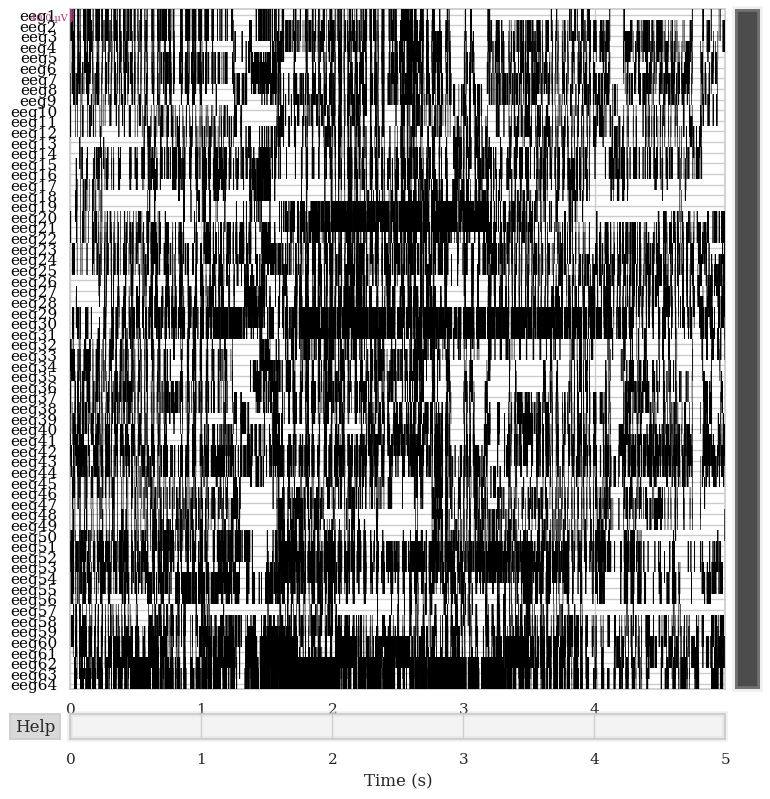

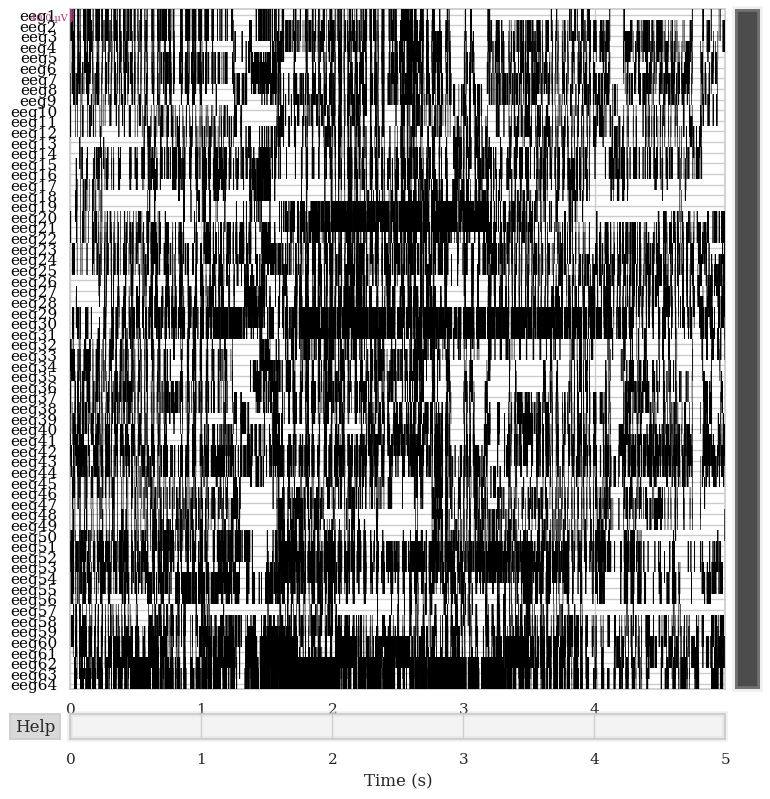

In [9]:
# imagery_right
info = mne.create_info(ch_names=ch_names, sfreq=1000, ch_types=ch_types)
raw = mne.io.RawArray(mat_file['eeg'][0]['imagery_right'][0][0:64, 0:5000], info=info)

raw.plot(n_channels=64)

* ```s1``` ~ ```s53``` 파일을 ```Raw```로 변환


In [57]:
subject_idx = []
subject_len = 53
for i in range(1, subject_len):
    subject_idx.append("./GIST_MI/s{:02}.mat".format(i))
    
# print(subject_idx)
mat_file_list = []
for i in range(1, subject_len):
    mat_file_list.append(scipy.io.loadmat(subject_idx[i-1]))
    
ch_names = []
ch_types = []

for i in range(1, len(mat_file['eeg'][0]['imagery_left'][0])-3):
    ch_names.append('eeg' + str(i))
    ch_types.append('eeg')    
    
raw_list = []
for i in range(1, subject_len):
    info = mne.create_info(ch_names=ch_names, sfreq=1000 ,ch_types=ch_types)
    left = mne.io.RawArray(mat_file_list[i-1]['eeg'][0]['imagery_left'][0][0:64, 0:5000], info=info)
    right = mne.io.RawArray(mat_file_list[i-1]['eeg'][0]['imagery_right'][0][0:64, 0:5000], info=info)
    raw_list.append([left, right])

    

Creating RawArray with float64 data, n_channels=64, n_times=5000
    Range : 0 ... 4999 =      0.000 ...     4.999 secs
Ready.
Creating RawArray with float64 data, n_channels=64, n_times=5000
    Range : 0 ... 4999 =      0.000 ...     4.999 secs
Ready.
Creating RawArray with float64 data, n_channels=64, n_times=5000
    Range : 0 ... 4999 =      0.000 ...     4.999 secs
Ready.
Creating RawArray with float64 data, n_channels=64, n_times=5000
    Range : 0 ... 4999 =      0.000 ...     4.999 secs
Ready.
Creating RawArray with float64 data, n_channels=64, n_times=5000
    Range : 0 ... 4999 =      0.000 ...     4.999 secs
Ready.
Creating RawArray with float64 data, n_channels=64, n_times=5000
    Range : 0 ... 4999 =      0.000 ...     4.999 secs
Ready.
Creating RawArray with float64 data, n_channels=64, n_times=5000
    Range : 0 ... 4999 =      0.000 ...     4.999 secs
Ready.
Creating RawArray with float64 data, n_channels=64, n_times=5000
    Range : 0 ... 4999 =      0.000 ...     4.

In [56]:
print("The number of subjects: ", len(raw_list))
print("s{:02}'s imagery_left info:".format(1), raw_list[0][0].info)
print("s{:02}'s imagery_right info:".format(1), raw_list[0][0].info)

The number of subjects:  52
s01's imagery_left info: <Info | 7 non-empty values
 bads: []
 ch_names: eeg1, eeg2, eeg3, eeg4, eeg5, eeg6, eeg7, eeg8, eeg9, eeg10, ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: unspecified
 nchan: 64
 projs: []
 sfreq: 1000.0 Hz
>
s01's imagery_right info: <Info | 7 non-empty values
 bads: []
 ch_names: eeg1, eeg2, eeg3, eeg4, eeg5, eeg6, eeg7, eeg8, eeg9, eeg10, ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: unspecified
 nchan: 64
 projs: []
 sfreq: 1000.0 Hz
>


# ERD